# **Boosting Techniques**

**Therotical**

Q.1 What is Boosting in Machine Learning?


Answer: Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) sequentially to create a strong predictive model. Each new model focuses on correcting the errors made by the previous ones.

Q.2 How does Boosting differ from Bagging?


Answer: In bagging, models are trained independently in parallel on different subsets of the data and then combined. In boosting, models are trained sequentially, each correcting the previous one.

Q.3 What is the key idea behind AdaBoost?


Answer: The key idea of AdaBoost is to assign higher weights to incorrectly classified instances so that the next weak learner focuses more on them.

Q.4 Explain the working of AdaBoost with an example.


Answer: AdaBoost starts with equal weights for all samples. A weak learner is trained, and misclassified samples are given higher weights. This process is repeated for several iterations, and predictions are combined through weighted voting. For example, three weak decision trees could be combined where the final output is the weighted majority vote.

Q.5 What is Gradient Boosting, and how is it different from AdaBoost?


Answer: Gradient Boosting minimizes a loss function by adding models that compute the gradient (error) of that loss. Unlike AdaBoost, which adjusts weights of instances, Gradient Boosting fits the residuals (errors) of the previous model.

Q.6 What is the loss function in Gradient Boosting?


Answer: The loss function depends on the task: mean squared error for regression, log-loss for classification, etc. Gradient Boosting minimizes this loss by fitting new models to the gradient of the loss.

Q.7 How does XGBoost improve over traditional Gradient Boosting?


Answer: XGBoost introduces regularization, tree pruning, parallel processing, and optimized handling of missing values to make Gradient Boosting faster and more accurate.

Q.8 What is the difference between XGBoost and CatBoost?


Answer: XGBoost is optimized for performance and speed and requires preprocessing of categorical variables. CatBoost is specifically designed to handle categorical features automatically and efficiently without preprocessing.

Q.9 What are some real-world applications of Boosting techniques?


Answer: Boosting is used in fraud detection, customer churn prediction, medical diagnosis, click-through rate prediction, and financial modeling due to its high accuracy.

Q.10 How does regularization help in XGBoost?


Answer: Regularization in XGBoost prevents overfitting by penalizing complex models. It uses L1 (lasso) and L2 (ridge) regularization techniques to shrink model weights.

Q.11 What are some hyperparameters to tune in Gradient Boosting models?


Answer: Important hyperparameters include number of estimators (n_estimators), learning rate, max_depth, subsample, min_samples_split, and loss function.

Q.12 What is the concept of Feature Importance in Boosting?


Answer: Feature importance measures how valuable each feature was in building the boosted model, usually based on how often and how significantly a feature is used to split nodes in trees.

Q.13 Why is CatBoost efficient for categorical data?


Answer: CatBoost handles categorical variables internally using a technique called "ordered boosting" and converts categories to numerical values with minimal preprocessing, reducing overfitting and improving accuracy.



**Practical**

Q14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.864


Q15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 63.100066474676346


Q16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print("Feature Importances:", model.feature_importances_)


Feature Importances: [2.03153934e-04 6.10971391e-02 1.32298233e-03 1.07994089e-03
 2.68509232e-03 5.11059141e-04 8.17826024e-03 4.63825391e-02
 5.00572217e-03 2.31362164e-03 4.35323090e-03 1.30175640e-03
 9.19377789e-04 1.40371930e-02 1.67809512e-03 1.18062084e-03
 3.45516601e-03 4.18715936e-03 6.74666924e-07 1.31093324e-03
 2.51137035e-03 3.34956619e-02 6.39277193e-01 3.24474159e-02
 1.23255519e-02 1.44392062e-02 6.30541088e-03 9.77258619e-02
 2.38093607e-04 3.05163630e-05]


Q17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.8338805496284682


Q18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [5]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))

print("XGBoost Accuracy:", xgb_acc)
print("Gradient Boosting Accuracy:", gb_acc)


XGBoost Accuracy: 0.9790209790209791
Gradient Boosting Accuracy: 0.965034965034965


Q19. Train a CatBoost Classifier and evaluate using F1-Score.

In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))


ModuleNotFoundError: No module named 'catboost'

Q20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.04301384836435318


Q21. Train an AdaBoost Classifier and visualize feature importance.

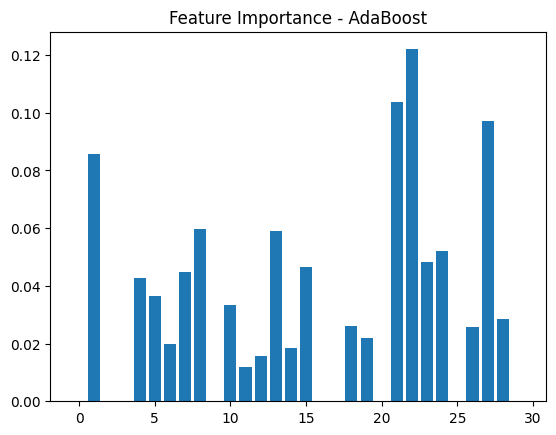

In [8]:
import matplotlib.pyplot as plt

model = AdaBoostClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

plt.bar(range(len(importances)), importances)
plt.title("Feature Importance - AdaBoost")
plt.show()


Q22. Train a Gradient Boosting Regressor and plot learning curves.

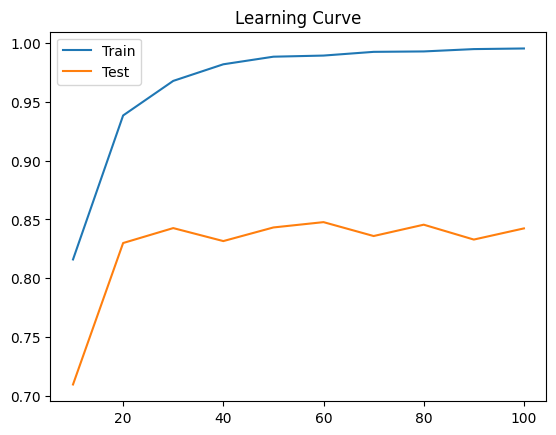

In [9]:
train_scores = []
test_scores = []

for n in range(10, 110, 10):
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(range(10, 110, 10), train_scores, label="Train")
plt.plot(range(10, 110, 10), test_scores, label="Test")
plt.legend(); plt.title("Learning Curve"); plt.show()


Q23. Train an XGBoost Classifier and visualize feature importance.

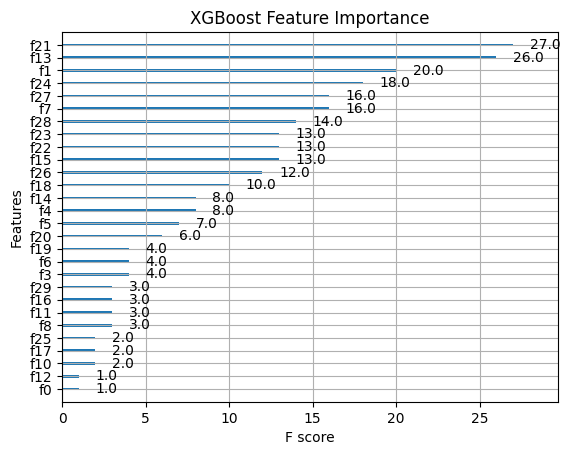

In [10]:
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()


Q24. Train a CatBoost Classifier and plot the confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


NameError: name 'CatBoostClassifier' is not defined

Q25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [12]:
for n in [10, 50, 100]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n}, Accuracy={acc}")


n_estimators=10, Accuracy=0.9440559440559441
n_estimators=50, Accuracy=0.993006993006993
n_estimators=100, Accuracy=0.993006993006993


Q26. Train a Gradient Boosting Classifier and visualize the ROC curve.

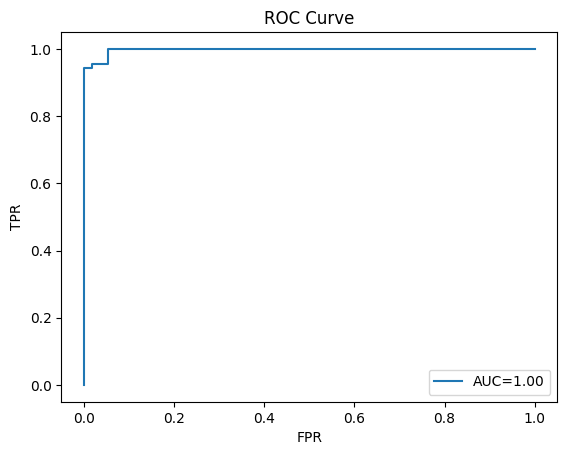

In [13]:
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(); plt.show()


Q27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(), params, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)


Best Params: {'learning_rate': 0.1}
Best R2 Score: 0.7669178962707519


Q28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [19]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

Q29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [16]:
for lr in [0.01, 0.1, 1]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning Rate={lr}, Accuracy={acc}")


Learning Rate=0.01, Accuracy=0.9230769230769231
Learning Rate=0.1, Accuracy=0.965034965034965
Learning Rate=1, Accuracy=0.993006993006993


Q30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [17]:
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = xgb.XGBClassifier(objective='multi:softprob', num_class=10)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_pred))


Log Loss: 0.0932241522498967
